In [1]:
# import the necessary packages
from sklearn.datasets import load_breast_cancer
# load the Breast Cancer Wisconsin (BCW) dataset
BCW_dataset = load_breast_cancer()
# visualise some features examples
BCW_dataset.feature_names
BCW_dataset.data[[5,50]]
# visualise some target examples
BCW_dataset.target_names
BCW_dataset.target[[5,50]]

array([0, 1])

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# load the Breast Cancer Wisconsin (BCW) dataset
BCW_dataset = load_breast_cancer()
#Assign the feature vectors (data) and target to separate variables
x= BCW_dataset.data
y= BCW_dataset.target
#Splitting the data into training and testing sets
(x_train, x_test,y_train, y_test) = train_test_split(x,y,random_state=3,test_size=0.20)

In [3]:
from sklearn.naive_bayes import GaussianNB
# train the model
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train, y_train)
# make predictions using new data (testing set)
GaussianNB_predictions = GaussianNB_model.predict(x_test)

In [4]:
# import the necessary packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# compute the classification confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, GaussianNB_predictions).ravel()
# compute the classification accuracy
GaussianNB_accuracy = accuracy_score(y_test, GaussianNB_predictions)
# compute the classification precision
GaussianNB_precision = precision_score(y_test, GaussianNB_predictions)
# compute the classification recall
GaussianNB_recall = recall_score(y_test, GaussianNB_predictions)
# compute the classification f1 score
GaussianNB_f1Score = f1_score(y_test, GaussianNB_predictions)

def accuracy_score(tp,tn,fp,fn):
    return ((tp+tn)/(tp+tn+fp+fn))

def precision_score(tp,fp):
    return (tp/(tp+fp))

def recall_score(tp,fn):
    return (tp/(tp+fn))

def f1_score(tp,fp,fn):
    return (tp/(tp+0.5*(fp+fn)))

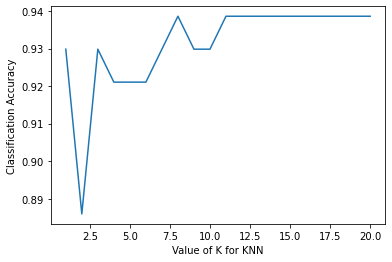

In [5]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#Evaluating KNeighborsClassifier from k=1 to 20
#and record the classification accuracy
k_range = range(1,21)
KNeighbors_accuracy = []
for k in k_range:
    KNeighbors_model = KNeighborsClassifier(n_neighbors=k)
    KNeighbors_model.fit(x_train,y_train)
    KNeighbors_predictions=KNeighbors_model.predict(x_test)
    KNeighbors_accuracy.append(accuracy_score(y_test,KNeighbors_predictions))
#plot the relationship between K and the classification accuracy
plt.plot(k_range,KNeighbors_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Classification Accuracy')
plt.show()

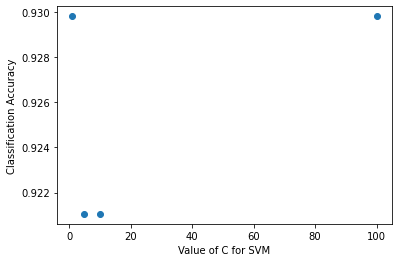

In [6]:
# import the necessary packages
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#Evaluating SVMClassifier for c=[1,5,10,100] and record classification accuracy
c_range = [1,5,10,100]
SVM_accuracy = []
for c in c_range:
    SVM_model = SVC(C=c,kernel='linear')
    SVM_model.fit(x_train,y_train)
    SVM_predictions=SVM_model.predict(x_test)
    SVM_accuracy.append(accuracy_score(y_test,SVM_predictions))
#plot the relationship between C and the classification accuracy
plt.scatter(c_range,SVM_accuracy)
plt.xlabel('Value of C for SVM')
plt.ylabel('Classification Accuracy')
plt.show()

In [7]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import joblib # for old versions use: from sklearn.externals import joblib
# Load BCW dataset
BCW_dataset = load_breast_cancer()
x= BCW_dataset.data
y= BCW_dataset.target
numFolds=5
skf = StratifiedKFold(n_splits=numFolds,shuffle=True,random_state=0)
model_folds_accuracy = []
best_model_accuracy =0
best_model =[]
x_test_best_model=[]
y_test_best_model=[]
for train_fold_indexs, test_fold_indexs in skf.split(x, y):
    x_train_fold = x[train_fold_indexs];
    y_train_fold = y[train_fold_indexs];
    x_test_fold = x[test_fold_indexs];
    y_test_fold = y[test_fold_indexs];
# train the model using the k fold train data
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train_fold,y_train_fold)
# make predictions using the k fold test data
    predictions = model.predict(x_test_fold)
# compute accuracy for the testing set of the k fold
    fold_accuracy= accuracy_score(y_test_fold,predictions)
    model_folds_accuracy.append(fold_accuracy)
# Update the best classification model based on the accuracy
    if fold_accuracy > best_model_accuracy:
        best_model_accuracy = fold_accuracy
        best_model = model
        x_test_best_model=x_test_fold
        y_test_best_model= y_test_fold
# print best model accuracy and average accuracy
model_folds_accuracy = np.array(model_folds_accuracy)
print('Best model accuracy:', best_model_accuracy)
print('mean accuracy:', model_folds_accuracy.mean())
print('std accuracy:', model_folds_accuracy.std())
#Save the best model to disk
joblib.dump(best_model,'best_kFold_model.pkl')
# some time later...
# load the model from disk
loaded_model = joblib.load('best_kFold_model.pkl')
predictions_loaded_model = loaded_model.predict(x_test_best_model)
accuracy_loaded_model = accuracy_score(y_test_best_model,predictions_loaded_model)
print('Accuracy load model:', accuracy_loaded_model)

Best model accuracy: 0.9646017699115044
mean accuracy: 0.931516845210371
std accuracy: 0.018621290927983335
Accuracy load model: 0.9646017699115044
